## Импорт библиотек и загрузка данных

> Блок с отступами

In [ ]:
# из библиотеки google.colab импортируем класс files
from google.colab import files

# создаем объект этого класса, применяем метод .upload()
uploaded = files.upload()

Saving with_metro_15_10_23_with_coord_15_10_23_updated_train.csv to with_metro_15_10_23_with_coord_15_10_23_updated_train.csv


In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
#df = pd.read_csv("train.csv", sep=",")
#df = pd.read_csv("with_coord_28_09_23_updated_train.csv", sep=",")
df = pd.read_csv("with_metro_15_10_23_with_coord_15_10_23_updated_train.csv", sep =',')

In [ ]:
df_metro = df.dropna(subset=['metro'])


In [ ]:
df_metro['metro']

Series([], Name: metro, dtype: float64)

## Описание данных исходного датасета

* `Unnamed: 0	` - индекс строки
* `id` - идентификатор
* `atm_group` - идентификатор Банка
* `address` - адрес в транслитерации
* `address_rus` - адрес
* `lat` - широта
* `long` - долгота
* `target` - целевая переменная

## Описание данных преобразованного датасета

* city_with_type - Город с типом
* city_fias_id  - ФИАС-код города
* city_district_with_type   - Адм. район города с типом
* city_district_fias_id   - ФИАС-код адм. района города
* federal_district  - Федеральный округ
* capital_marker     - Признак центра района или региона
* fias_id               - код адреса согласно ГАР (object GUID)
* fias_level     - Уровень детализации, до которого адрес найден в ФИАС (ГАР)( 0 — страна
  1 — регион
  3 — район
  4 — город
  5 — район города
  6 — населенный пункт
  7 — улица
  8 — дом
  9 — квартира или комната
 65 — планировочная структура
 75 — земельный участок
 -1 — иностранный или пустой)
* metro                     - Список ближайших станций метро (до трёх штук)
* region_with_type - Регион с типом
region_fias_id              object
* settlement_with_type  - Населенный пункт с типом
* settlement_fias_id  -ФИАС-код нас. пункта
* street_with_type  - Улица с типом
* street_fias_id -  ФИАС-код улицы
* city_lat         
* city_lon                   float64
* region_lat                 float64
* region_lon                 float64
* street_lat                 float64
* street_lon         

## Исследование данных исходного датасета

*Размер* датасета

In [ ]:
df.shape


(6261, 44)

####Информация о типах данных и пропусках

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6261 entries, 0 to 6260
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               6261 non-null   int64  
 1   id                       6261 non-null   float64
 2   atm_group                6261 non-null   float64
 3   address                  6261 non-null   object 
 4   address_rus              5957 non-null   object 
 5   lat                      5957 non-null   float64
 6   long                     5957 non-null   float64
 7   target                   6261 non-null   float64
 8   area_fias_id             820 non-null    object 
 9   area_with_type           820 non-null    object 
 10  city_with_type           5626 non-null   object 
 11  city_fias_id             5626 non-null   object 
 12  federal_district         5914 non-null   object 
 13  capital_marker           5914 non-null   float64
 14  fias_id                 

In [ ]:
#Название столбцов
df.columns

Index(['Unnamed: 0', 'id', 'atm_group', 'address', 'address_rus', 'lat',
       'long', 'target', 'area_fias_id', 'area_with_type', 'city_with_type',
       'city_fias_id', 'federal_district', 'capital_marker', 'fias_id',
       'fias_level', 'region_with_type', 'region_fias_id',
       'settlement_with_type', 'settlement_fias_id', 'street_with_type',
       'street_fias_id', 'city_lat', 'city_lon', 'region_lat', 'region_lon',
       'street_lat', 'street_lon', 'city_area', 'city_district_fias_id',
       'city_district_with_type', 'area_lat', 'area_lon', 'settlement_lat',
       'settlement_lon', 'metro_station_name_1', 'metro_line_name_1',
       'metro_distance_1', 'metro_station_name_2', 'metro_line_name_2',
       'metro_distance_2', 'metro_station_name_3', 'metro_line_name_3',
       'metro_distance_3'],
      dtype='object')

In [ ]:
# Типы столбцов
df.dtypes

Unnamed: 0                   int64
id                         float64
atm_group                  float64
address                     object
address_rus                 object
lat                        float64
long                       float64
target                     float64
area_fias_id                object
area_with_type              object
city_with_type              object
city_fias_id                object
federal_district            object
capital_marker             float64
fias_id                     object
fias_level                 float64
region_with_type            object
region_fias_id              object
settlement_with_type        object
settlement_fias_id          object
street_with_type            object
street_fias_id              object
city_lat                   float64
city_lon                   float64
region_lat                 float64
region_lon                 float64
street_lat                 float64
street_lon                 float64
city_area           

In [ ]:
df.describe()

,Unnamed: 0,id,atm_group,lat,long,target,capital_marker,fias_level,city_lat,city_lon,...,region_lon,street_lat,street_lon,area_lat,area_lon,settlement_lat,settlement_lon,metro_distance_1,metro_distance_2,metro_distance_3
count,6261.00000,6261.000000,6261.000000,5957.000000,5957.000000,6261.000000,5914.000000,5914.000000,5626.000000,5626.000000,...,763.000000,5729.000000,5729.000000,118.000000,118.000000,492.000000,492.000000,1130.000000,1114.000000,1093.000000
mean,3130.00000,4419.120827,4417.937230,54.160017,63.519692,0.000715,1.201387,7.990700,54.216895,62.778912,...,35.791871,54.121608,63.582412,55.843538,37.790016,53.503489,69.712890,0.933274,1.531598,2.029826
std,1807.53935,2547.213467,2430.413287,4.346200,33.020176,0.085852,0.926994,3.016962,4.310119,32.642702,...,3.166404,4.362029,33.012091,0.299959,0.758618,4.236034,33.812571,1.060069,1.075859,1.147799
min,0.00000,5.000000,32.000000,42.057080,19.941530,-0.145001,0.000000,1.000000,42.059022,19.945438,...,30.315879,42.056056,19.940686,55.102792,36.724060,42.655272,28.895147,0.000000,0.000000,0.100000
25%,1565.00000,2228.000000,1942.000000,52.248916,37.858986,-0.061176,0.000000,8.000000,52.337971,37.736330,...,33.968136,52.162868,37.877994,55.678971,37.263609,51.694387,38.143318,0.200000,0.800000,1.200000
50%,3130.00000,4392.000000,5478.000000,55.069638,48.578510,-0.015573,2.000000,8.000000,55.160283,48.374916,...,37.620393,55.046398,49.084567,55.815137,37.620393,53.932474,54.988506,0.500000,1.200000,1.800000
75%,4695.00000,6660.000000,5478.000000,56.122756,84.951080,0.040149,2.000000,8.000000,56.143900,83.779875,...,37.620393,56.119047,84.948134,56.010428,38.462228,55.747978,91.398747,1.200000,2.000000,2.700000
max,6260.00000,8811.000000,8083.000000,69.491912,173.706490,0.218608,4.000000,65.000000,69.413269,158.655954,...,37.620393,69.500427,158.725448,56.347649,39.544477,69.410035,158.287815,5.000000,4.800000,5.000000


In [ ]:
df['atm_group'].nunique()


7

In [ ]:
df.describe()

,Unnamed: 0,id,atm_group,lat,long,target,capital_marker,fias_level,city_lat,city_lon,...,region_lon,street_lat,street_lon,area_lat,area_lon,settlement_lat,settlement_lon,metro_distance_1,metro_distance_2,metro_distance_3
count,6261.00000,6261.000000,6261.000000,5957.000000,5957.000000,6261.000000,5914.000000,5914.000000,5626.000000,5626.000000,...,763.000000,5729.000000,5729.000000,118.000000,118.000000,492.000000,492.000000,1130.000000,1114.000000,1093.000000
mean,3130.00000,4419.120827,4417.937230,54.160017,63.519692,0.000715,1.201387,7.990700,54.216895,62.778912,...,35.791871,54.121608,63.582412,55.843538,37.790016,53.503489,69.712890,0.933274,1.531598,2.029826
std,1807.53935,2547.213467,2430.413287,4.346200,33.020176,0.085852,0.926994,3.016962,4.310119,32.642702,...,3.166404,4.362029,33.012091,0.299959,0.758618,4.236034,33.812571,1.060069,1.075859,1.147799
min,0.00000,5.000000,32.000000,42.057080,19.941530,-0.145001,0.000000,1.000000,42.059022,19.945438,...,30.315879,42.056056,19.940686,55.102792,36.724060,42.655272,28.895147,0.000000,0.000000,0.100000
25%,1565.00000,2228.000000,1942.000000,52.248916,37.858986,-0.061176,0.000000,8.000000,52.337971,37.736330,...,33.968136,52.162868,37.877994,55.678971,37.263609,51.694387,38.143318,0.200000,0.800000,1.200000
50%,3130.00000,4392.000000,5478.000000,55.069638,48.578510,-0.015573,2.000000,8.000000,55.160283,48.374916,...,37.620393,55.046398,49.084567,55.815137,37.620393,53.932474,54.988506,0.500000,1.200000,1.800000
75%,4695.00000,6660.000000,5478.000000,56.122756,84.951080,0.040149,2.000000,8.000000,56.143900,83.779875,...,37.620393,56.119047,84.948134,56.010428,38.462228,55.747978,91.398747,1.200000,2.000000,2.700000
max,6260.00000,8811.000000,8083.000000,69.491912,173.706490,0.218608,4.000000,65.000000,69.413269,158.655954,...,37.620393,69.500427,158.725448,56.347649,39.544477,69.410035,158.287815,5.000000,4.800000,5.000000


Есть пропуски по нескольким банкоматам в полях расположение

In [ ]:
df.tail(5)

,Unnamed: 0,id,atm_group,address,address_rus,lat,long,target,area_fias_id,area_with_type,...,settlement_lon,metro_station_name_1,metro_line_name_1,metro_distance_1,metro_station_name_2,metro_line_name_2,metro_distance_2,metro_station_name_3,metro_line_name_3,metro_distance_3
6256,6256,4402.0,8083.0,"FEDORA POPOVA, 14 Yakutsk","улица Федора Попова, 14, Якутск, Республика Са...",62.045259,129.748896,0.207916,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6257,6257,4421.0,8083.0,"STROITELEY, 43 Novokuznetsk","проспект Строителей, 43, Новокузнецк, Кемеровс...",53.769459,87.117251,0.062220,NaN,NaN,...,87.099240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6258,6258,4422.0,8083.0,"Rublevskoye sh, 62 Moskva","Рублёвское шоссе, 62, Москва, Россия, 121609",55.766212,37.380875,0.108743,NaN,NaN,...,NaN,Крылатское,Арбатско-Покровская,2.0,Молодёжная,Арбатско-Покровская,3.5,Строгино,Арбатско-Покровская,4.4
6259,6259,4426.0,8083.0,"EFANOVA, 22 Zyryanskoye","улица Ефанова, 22, село Зырянское, Зырянский р...",56.838223,86.640829,0.148938,9e3d4605-701e-4733-b6ed-1d03a2b5d4fe,Зырянский р-н,...,86.625504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6260,6260,4429.0,8083.0,"OMMUNISTICHESKAYA,10A Kizhinga","Коммунистическая улица, 10А, село Кижинга, Киж...",51.848725,109.905102,0.089919,d142ee10-5d45-4de9-87e6-74b3aa7fe178,Кижингинский р-н,...,109.906485,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Пропущенные значения
df.isna().sum()

Unnamed: 0                    0
id                            0
atm_group                     0
address                       0
address_rus                 304
lat                         304
long                        304
target                        0
area_fias_id               5441
area_with_type             5441
city_with_type              635
city_fias_id                635
federal_district            347
capital_marker              347
fias_id                     347
fias_level                  347
region_with_type            347
region_fias_id              347
settlement_with_type       5768
settlement_fias_id         5768
street_with_type            531
street_fias_id              532
city_lat                    635
city_lon                    635
region_lat                 5498
region_lon                 5498
street_lat                  532
street_lon                  532
city_area                  5717
city_district_fias_id      6131
city_district_with_type    4525
area_lat

Получилось довольно много пустых строк:

*   area_fias_id
*   area_with_type
*   settlement_with_type
*   settlement_fias_id
*   city_district_fias_id
*   city_district_with_type
*   area_lat
*   area_lon



Непустые поля settlement_with_type

In [ ]:
filtered_df = df.dropna(subset=['settlement_with_type'])
filtered_df

,Unnamed: 0,id,atm_group,address,address_rus,lat,long,target,area_fias_id,area_with_type,...,settlement_lon,metro_station_name_1,metro_line_name_1,metro_distance_1,metro_station_name_2,metro_line_name_2,metro_distance_2,metro_station_name_3,metro_line_name_3,metro_distance_3
8,8,2895.0,32.0,Zhivopisnaia 136 d.Velednikov,"деревня Веледниково, городской округ Истра, Мо...",55.799765,37.116016,0.141469,f05b2b62-f54c-4b44-aff2-6bc3e55a640c,г Истра,...,37.116016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,16,2017.0,496.5,DORZHIEVA 24A MUKHORSHIBIR,"улица Доржиева, 24А, село Мухоршибирь, Республ...",51.048934,107.822322,0.017373,3bf41fa7-60a5-4b9c-9ee3-8ab2a5a90a9b,Мухоршибирский р-н,...,107.823670,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,17,2022.0,496.5,SADOVAYA 27B KRIVODANOVKA,"Садовая улица, 27, село Криводановка, Новосиби...",55.086363,82.646830,-0.027657,16932400-c8e3-4a17-8c57-d96f30a183ce,Новосибирский р-н,...,82.661894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,18,2023.0,496.5,SOVETSKAYA 19 KUGESI,"Советская улица, 19, поселок городского типа К...",56.029642,47.294593,-0.077871,75b5fa1f-d054-4207-a56a-1d75e8eae490,Чебоксарский р-н,...,47.297638,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,19,2027.0,496.5,MELNIKOVA 106 CHERLAK,"улица Мельникова, 106, посёлок городского типа...",54.151887,74.797890,-0.050627,5fd35313-9a47-41d7-9e7b-3f1caa022e1f,Черлакский р-н,...,74.804456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6244,6244,4339.0,8083.0,"MOLODEZHNAY, 3 Zarubino","Молодёжная улица, 7, поселок городского типа З...",42.648627,131.080657,0.169729,f7b61408-6130-420c-b46f-82dcab78a96f,Хасанский р-н,...,131.088374,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6245,6245,4340.0,8083.0,"2 MKRN., 19 Luchegorsk","2-й микрорайон, 19, посёлок городского типа Лу...",46.447236,134.306768,0.218608,d77cc950-d159-4341-acad-57404d3ca3e1,Пожарский р-н,...,134.289358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6257,6257,4421.0,8083.0,"STROITELEY, 43 Novokuznetsk","проспект Строителей, 43, Новокузнецк, Кемеровс...",53.769459,87.117251,0.062220,NaN,NaN,...,87.099240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6259,6259,4426.0,8083.0,"EFANOVA, 22 Zyryanskoye","улица Ефанова, 22, село Зырянское, Зырянский р...",56.838223,86.640829,0.148938,9e3d4605-701e-4733-b6ed-1d03a2b5d4fe,Зырянский р-н,...,86.625504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Строки, в которых нет координат

In [ ]:
df_with_empty_lat = df[(df['lat'].isna()) | (df['address_rus'].isna())]
df_with_empty_lat

,Unnamed: 0,id,atm_group,address,address_rus,lat,long,target,area_fias_id,area_with_type,...,settlement_lon,metro_station_name_1,metro_line_name_1,metro_distance_1,metro_station_name_2,metro_line_name_2,metro_distance_2,metro_station_name_3,metro_line_name_3,metro_distance_3
40,40,4510.0,496.5,PER. BAZARNY 4 SPASSK-DALNY,NaN,NaN,NaN,0.039191,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150,150,347.0,1022.0,ABB 6B NAB-CHELNINSKIJ NAB.CHELNY,NaN,NaN,NaN,-0.145001,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182,182,1591.0,1942.0,16A BEREJKOVSK NAB MOSCOW,NaN,NaN,NaN,0.080034,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192,192,440.0,1942.0,113 MIRA AV. TOGLIATTI,NaN,NaN,NaN,-0.082956,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
214,214,556.0,1942.0,133A MOZHAYSKOE H/W. MOSCOW,NaN,NaN,NaN,0.061517,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6158,6158,3751.0,8083.0,"SEVASTOPOLSKIY ,43A.2 Magadan",NaN,NaN,NaN,0.040149,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6166,6166,3794.0,8083.0,Universitetskiy 105 Volgograd,NaN,NaN,NaN,0.102689,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6198,6198,4038.0,8083.0,"KRONDSHTAT. ST., 113 Vyazma",NaN,NaN,NaN,0.067411,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6222,6222,4209.0,8083.0,"KSK 5 MKR, 29 CHita",NaN,NaN,NaN,0.151250,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Другое

##Матрица корреляции

In [ ]:
df = df.drop('Unnamed: 0', axis=1)

<ipython-input-79-2aba822ade4c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr() # матрица корреляций


<Axes: >

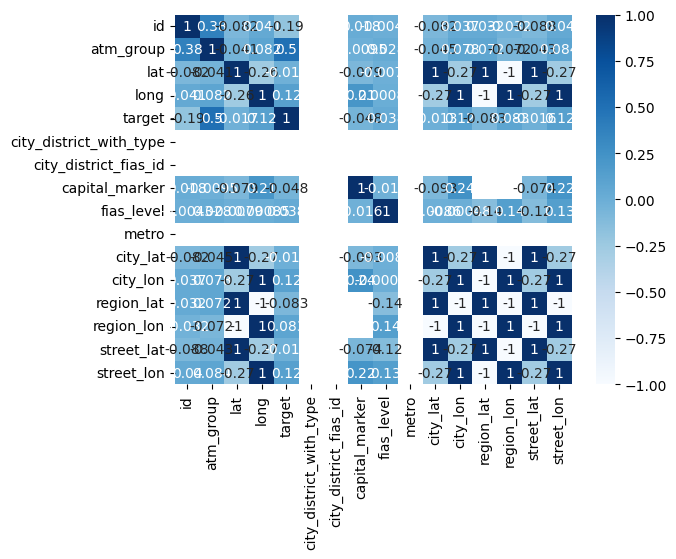

In [ ]:
corr = df.corr() # матрица корреляций

sns.heatmap(corr, cmap="Blues", annot=True)

##Анализ даных по 'atm_group'

In [ ]:
df.groupby('atm_group').count()[['id']]

,id
atm_group,
32.0,43
496.5,616
1022.0,136
1942.0,1160
3185.5,594
5478.0,2662
8083.0,1050


In [ ]:
df.groupby(by='atm_group')[['target']].mean()

,target
atm_group,
32.0,0.008198
496.5,-0.047669
1022.0,-0.089226
1942.0,0.004272
3185.5,-0.043811
5478.0,-0.034487
8083.0,0.150946


<Axes: title={'center': 'target'}, xlabel='atm_group'>

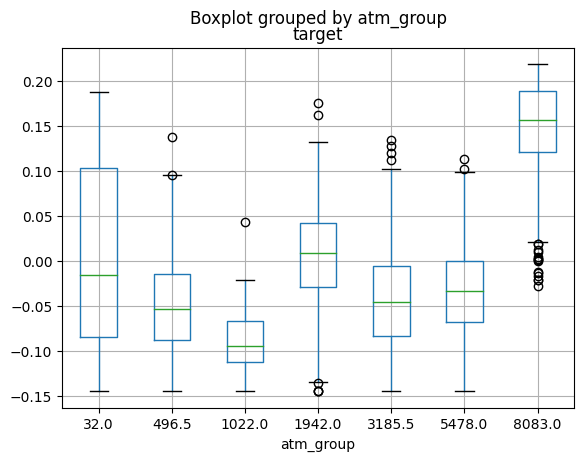

In [ ]:
df.boxplot(column=['target'],by='atm_group')

In [ ]:
import numpy as np

columns_to_show = ['target']

df.groupby(['atm_group'])[columns_to_show].agg([np.mean, np.std, np.min, np.max])

target                              
               mean       std      amin      amax
atm_group                                        
32.0       0.008198  0.106251 -0.145001  0.187148
496.5     -0.047669  0.051260 -0.145001  0.137125
1022.0    -0.089226  0.034243 -0.145001  0.043012
1942.0     0.004272  0.051111 -0.145001  0.175757
3185.5    -0.043811  0.054739 -0.145001  0.134733
5478.0    -0.034487  0.047057 -0.145001  0.112885
8083.0     0.150946  0.048439 -0.027398  0.218608

<class 'numpy.ndarray'>


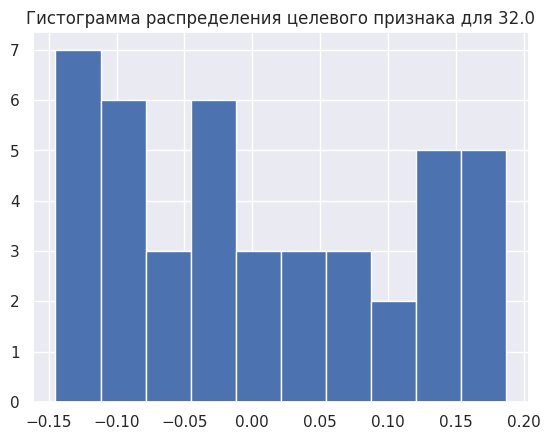

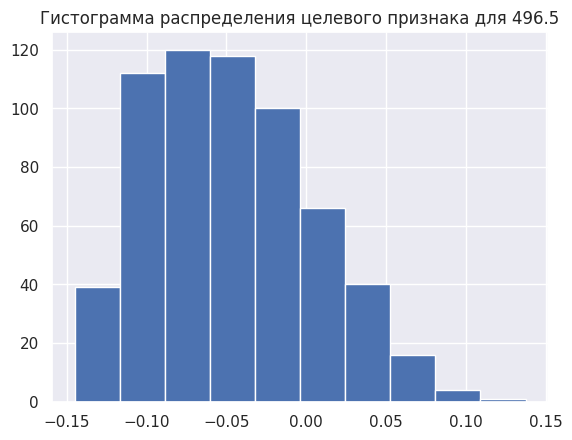

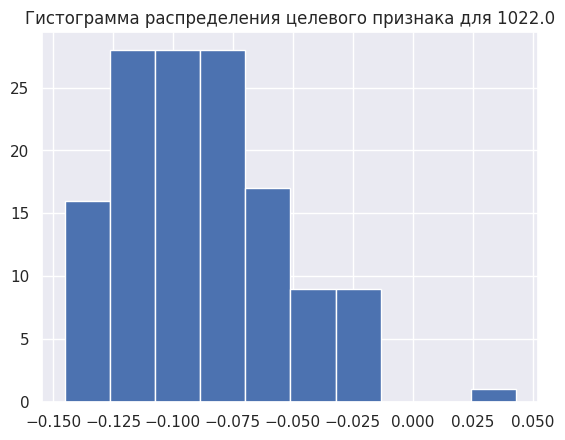

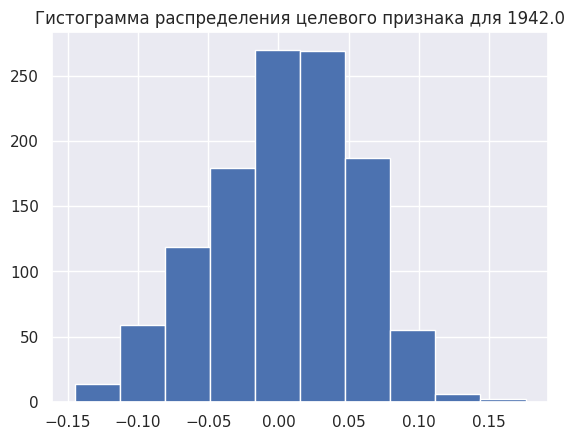

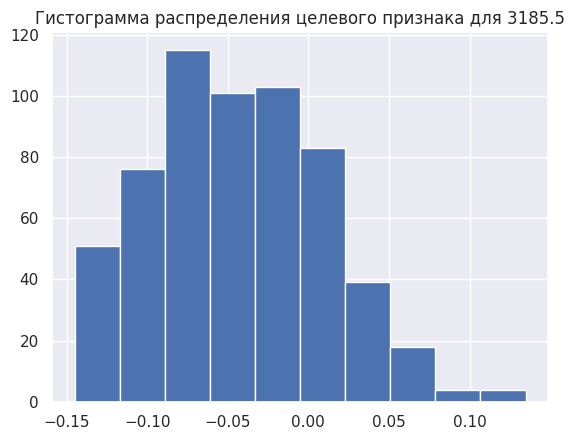

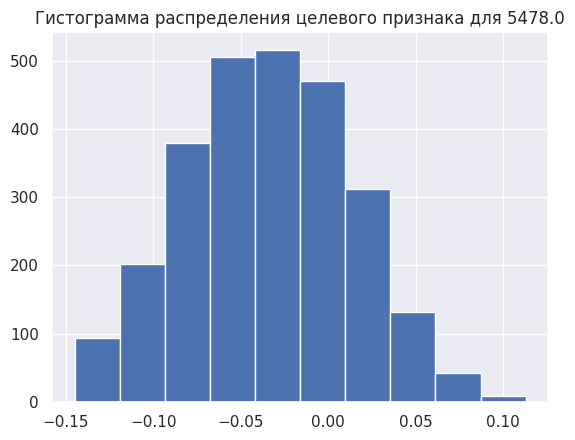

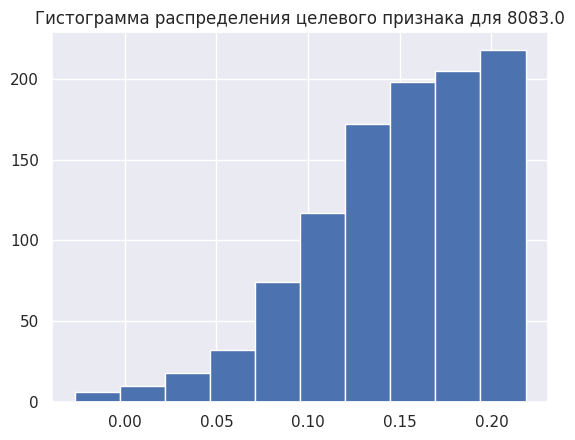

In [ ]:
# импорт библиотек для графиков
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

atm_groups = df['atm_group'].unique()

for atm_group in atm_groups:
  filtered_data = df[df['atm_group']==atm_group]
  plt.hist(filtered_data['target'], bins=10)
  plt.title(f'Гистограмма распределения целевого признака для {atm_group}')
  plt.show()


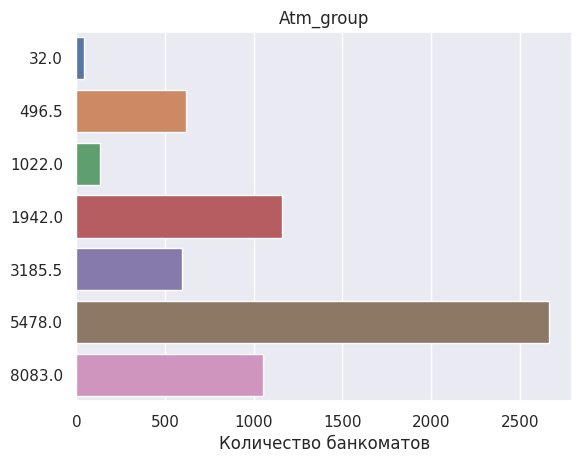

In [ ]:
sns.set()

fig, ax = plt.subplots()
ax = sns.countplot(y='atm_group', data=df)
ax.set_title('Atm_group')
ax.set_ylabel('')

ax.set(xlabel='Количество банкоматов')


plt.show()